In [256]:
import numpy as np
import pandas as pd

pageviews = pd.read_csv("C:\\Users\\virin\\Desktop\\data_test_pageviews.csv")
inquiries = pd.read_csv("C:\\Users\\virin\\Desktop\\data_test_inquiries.csv")

In [257]:
pageviews.head()

,anonymous_id,logged_in,received_at,path,referrer
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,NaN
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/


In [258]:
inquiries.head()

,anonymous_id,logged_in,received_at,path,referrer
0,e5d28888-e639-436c-9728-8f136e9518ce,True,2017-03-12 00:27:50.604,/inquiry/ryan-and-trevor-oakes-have-no-narrow-...,https://m.artsy.net/artwork/ryan-and-trevor-oa...
1,bb192057-471a-45db-beab-b83daefaec55,True,2017-03-12 00:35:41.527,/artwork/andres-mariani-northern-particles,https://www.artsy.net/artist/andres-mariani
2,6600da8f-df47-4aa4-a7ec-18a1e03c364d,False,2017-03-12 00:43:49.340,/artwork/ann-gardner-bubbles-ii,https://www.artsy.net/artist/ann-gardner?for_s...
3,d3db8c7b-d1d0-485c-8d25-f3efbf3b8290,True,2017-03-12 01:18:29.572,/artwork/eamon-ore-giron-roman-blues-i,https://www.artsy.net/artist/eamon-ore-giron
4,5dbd4099-6ab7-4db7-8846-273ca95b9a40,True,2017-03-12 01:22:58.067,/artwork/evgenia-arbugaeva-from-the-series-wea...,https://www.artsy.net/artist/evgenia-arbugaeva...


<h3> On Examining the datasets we can categorize the url's path by split the path according to the types such as enquiry or artwork or artist </h3>

<h2> Splitting the path <h2>

In [259]:
inquiries['type'] = inquiries['path'].str.split('/')

In [260]:
inquiries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4092 entries, 0 to 4091
Data columns (total 6 columns):
anonymous_id    4092 non-null object
logged_in       4092 non-null bool
received_at     4092 non-null object
path            4092 non-null object
referrer        3825 non-null object
type            4092 non-null object
dtypes: bool(1), object(5)
memory usage: 163.9+ KB


In [261]:
inquiries['type'][0][1]

'inquiry'

In [262]:
types =[]
for i in range(0,len(inquiries)):
    types.append(inquiries['type'][i][1])

In [263]:
inquiries.head()

,anonymous_id,logged_in,received_at,path,referrer,type
0,e5d28888-e639-436c-9728-8f136e9518ce,True,2017-03-12 00:27:50.604,/inquiry/ryan-and-trevor-oakes-have-no-narrow-...,https://m.artsy.net/artwork/ryan-and-trevor-oa...,"[, inquiry, ryan-and-trevor-oakes-have-no-narr..."
1,bb192057-471a-45db-beab-b83daefaec55,True,2017-03-12 00:35:41.527,/artwork/andres-mariani-northern-particles,https://www.artsy.net/artist/andres-mariani,"[, artwork, andres-mariani-northern-particles]"
2,6600da8f-df47-4aa4-a7ec-18a1e03c364d,False,2017-03-12 00:43:49.340,/artwork/ann-gardner-bubbles-ii,https://www.artsy.net/artist/ann-gardner?for_s...,"[, artwork, ann-gardner-bubbles-ii]"
3,d3db8c7b-d1d0-485c-8d25-f3efbf3b8290,True,2017-03-12 01:18:29.572,/artwork/eamon-ore-giron-roman-blues-i,https://www.artsy.net/artist/eamon-ore-giron,"[, artwork, eamon-ore-giron-roman-blues-i]"
4,5dbd4099-6ab7-4db7-8846-273ca95b9a40,True,2017-03-12 01:22:58.067,/artwork/evgenia-arbugaeva-from-the-series-wea...,https://www.artsy.net/artist/evgenia-arbugaeva...,"[, artwork, evgenia-arbugaeva-from-the-series-..."


In [264]:
df = pd.DataFrame(types, columns = ['Types'])

In [265]:
data_types = pd.concat([inquiries,df], axis =1)

In [266]:
data_types.drop(['type'],axis =1, inplace = True)

In [267]:
data_types['Types'].unique()

array(['inquiry', 'artwork', 'the-armory-show-2017',
       'cape-town-art-fair-2017'], dtype=object)

In [268]:
data_types.head()

,anonymous_id,logged_in,received_at,path,referrer,Types
0,e5d28888-e639-436c-9728-8f136e9518ce,True,2017-03-12 00:27:50.604,/inquiry/ryan-and-trevor-oakes-have-no-narrow-...,https://m.artsy.net/artwork/ryan-and-trevor-oa...,inquiry
1,bb192057-471a-45db-beab-b83daefaec55,True,2017-03-12 00:35:41.527,/artwork/andres-mariani-northern-particles,https://www.artsy.net/artist/andres-mariani,artwork
2,6600da8f-df47-4aa4-a7ec-18a1e03c364d,False,2017-03-12 00:43:49.340,/artwork/ann-gardner-bubbles-ii,https://www.artsy.net/artist/ann-gardner?for_s...,artwork
3,d3db8c7b-d1d0-485c-8d25-f3efbf3b8290,True,2017-03-12 01:18:29.572,/artwork/eamon-ore-giron-roman-blues-i,https://www.artsy.net/artist/eamon-ore-giron,artwork
4,5dbd4099-6ab7-4db7-8846-273ca95b9a40,True,2017-03-12 01:22:58.067,/artwork/evgenia-arbugaeva-from-the-series-wea...,https://www.artsy.net/artist/evgenia-arbugaeva...,artwork


<h2>Question 2 </h2>

In [276]:
pageviews['type'] = pageviews['path'].str.split('/')

In [277]:
types =[]
for i in range(0,len(pageviews)):
    types.append(pageviews['type'][i][1])

In [278]:
df = pd.DataFrame(types, columns = ['Types'])

In [279]:
data_types_pv = pd.concat([pageviews,df], axis =1)

In [280]:
data_types_pv.drop(['type'],axis =1, inplace = True)

In [281]:
data_types_pv['Types'].unique()

array(['artist', 'artwork', 'article', ..., 'sjma', '6x7-gallery-warsaw',
       'design-miami-basel-2016'], dtype=object)

Adding new column Types to the dataframe

In [282]:
data_types_pv.head()

,anonymous_id,logged_in,received_at,path,referrer,Types
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com,artist
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,NaN,artwork
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/,article
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,article
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/,article


<h2> Question 3 </h2>

In [285]:
df = data_types_pv.groupby('Types')

In [286]:
df_False = (data_types_pv[data_types_pv['logged_in'] == False])

In [287]:
df_False

,anonymous_id,logged_in,received_at,path,referrer,Types
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com,artist
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,NaN,artwork
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/,article
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,article
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/,article
5,424776e9-5023-4c1a-950b-25da172990cb,False,2017-03-20 13:12:57.453,/gallery-partnerships,NaN,gallery-partnerships
6,38a38aa5-00f6-46e8-8b16-0ca3d1890d2d,False,2017-03-25 01:28:37.583,/artwork/shepard-fairey-marcos-diagram,https://www.google.ca/,artwork
7,2f97afde-b7fb-4dc3-aaa8-79fdb100beb3,False,2017-03-23 09:12:22.880,/artist/kehinde-wiley,https://www.google.com.au/,artist
8,b45d3f53-51b3-4a53-a170-af81ceb8c05b,False,2017-03-14 15:52:14.650,/artwork/mario-rossi-plaza-italia,https://www.artsy.net/artwork/mario-rossi-sudo...,artwork
9,f983741d-fff2-483e-88b0-e5375d69b7a7,False,2017-03-23 16:02:29.080,/guggenheim,https://www.artsy.net/article/artsy-editorial-...,guggenheim


In [288]:
df_True = (data_types_pv[data_types_pv['logged_in'] == True])

In [289]:
df_True

,anonymous_id,logged_in,received_at,path,referrer,Types
11,11f73797-02f4-4b59-a834-5779060444a9,True,2017-03-12 18:50:55.980,/article/artsy-editorial-virtual-reality-is-th...,https://www.google.com/,article
12,a3d1df56-4b47-4c1f-b438-9ae60e7e6f13,True,2017-03-15 19:49:19.895,/,NaN,
14,e21da1c8-2b00-4b8e-a8eb-d99a890f1e6d,True,2017-03-16 17:02:21.028,/artwork/andersson-slash-nordstrom-faces-lou-r...,NaN,artwork
21,59357462-c30e-43c1-b318-b556eef87e22,True,2017-03-14 22:02:59.485,/artist/richard-aldrich/cv,https://www.artsy.net/artist/richard-aldrich?f...,artist
34,29de32ba-adec-4643-a551-ad18bae73f3c,True,2017-03-18 07:12:00.195,/artist/alexander-calder,https://www.artsy.net/,artist
37,7f80dc41-2b99-46ba-96c7-a460f52e691c,True,2017-03-17 12:13:44.667,/artist/carrie-moyer,https://www.google.com/,artist
38,fe585039-011b-4785-a879-769001d2d574,True,2017-03-22 18:32:50.697,/artist/james-vance,NaN,artist
40,841ffa4e-b14c-4010-af81-b15e649cfc9c,True,2017-03-24 14:58:46.229,/search,https://www.artsy.net/,search
43,3a2bf6a7-dfa3-4f98-aab2-962696cc16e3,True,2017-03-16 22:42:01.032,/artist/harland-miller/payoff,https://www.artsy.net/artist/harland-miller,artist
49,7abb81f8-2f17-4a93-90f5-b8362823a79f,True,2017-03-12 15:20:56.726,/reset_password,NaN,reset_password


<h3> Number of pageviews depending on the type when user is logged in </h3>

In [290]:
import seaborn as sns
import matplotlib.pyplot as plt
login_count_true = pd.value_counts(df_True['Types'])
login_count_true


artwork                           4722
artist                            3917
article                           1807
                                  1369
search                             813
show                               751
dev                                728
auction                            563
artists                            369
works-for-you                      353
collect                            327
user                               325
auctions                           167
gene                               155
art-basel-in-hong-kong-2017        140
articles                           132
shows                              105
galleries                           97
art-fairs                           65
art-central-2017                    60
market-art-fair-2017                60
miart-2017                          43
profile                             39
aipad-2017                          36
inquiry                             33
log_in                   

<h3> Number of pageviews depending on the type when user is logged out </h3>

In [291]:
login_count_false = pd.value_counts(df_False['Types'])
login_count_false


artist                                             22955
article                                            21680
artwork                                            17777
                                                    2914
show                                                2576
search                                              1790
artists                                             1572
collect                                             1317
gene                                                1287
auction                                              854
galleries                                            393
dev                                                  389
reach-collectors-2017                                376
articles                                             337
shows                                                316
art-central-2017                                     257
art-basel-in-hong-kong-2017                          249
auctions                       

In [292]:
data_types.head()

,anonymous_id,logged_in,received_at,path,referrer,Types,referrer_types
0,e5d28888-e639-436c-9728-8f136e9518ce,True,2017-03-12 00:27:50.604,/inquiry/ryan-and-trevor-oakes-have-no-narrow-...,https://m.artsy.net/artwork/ryan-and-trevor-oa...,inquiry,"[https:, , m.artsy.net, artwork, ryan-and-trev..."
1,bb192057-471a-45db-beab-b83daefaec55,True,2017-03-12 00:35:41.527,/artwork/andres-mariani-northern-particles,https://www.artsy.net/artist/andres-mariani,artwork,"[https:, , www.artsy.net, artist, andres-mariani]"
2,6600da8f-df47-4aa4-a7ec-18a1e03c364d,False,2017-03-12 00:43:49.340,/artwork/ann-gardner-bubbles-ii,https://www.artsy.net/artist/ann-gardner?for_s...,artwork,"[https:, , www.artsy.net, artist, ann-gardner?..."
3,d3db8c7b-d1d0-485c-8d25-f3efbf3b8290,True,2017-03-12 01:18:29.572,/artwork/eamon-ore-giron-roman-blues-i,https://www.artsy.net/artist/eamon-ore-giron,artwork,"[https:, , www.artsy.net, artist, eamon-ore-gi..."
4,5dbd4099-6ab7-4db7-8846-273ca95b9a40,True,2017-03-12 01:22:58.067,/artwork/evgenia-arbugaeva-from-the-series-wea...,https://www.artsy.net/artist/evgenia-arbugaeva...,artwork,"[https:, , www.artsy.net, artist, evgenia-arbu..."


<h1>Question 4</h1>

In [312]:
data_type_in = data_types[data_types['Types']=='inquiry']

In [313]:
data_type_in

,anonymous_id,logged_in,received_at,path,referrer,Types,referrer_types,inquiry_type
0,e5d28888-e639-436c-9728-8f136e9518ce,True,2017-03-12 00:27:50.604,/inquiry/ryan-and-trevor-oakes-have-no-narrow-...,https://m.artsy.net/artwork/ryan-and-trevor-oa...,inquiry,"[https:, , m.artsy.net, artwork, ryan-and-trev...","[https:, , m.artsy.net, artwork, ryan-and-trev..."
5,e3504db7-4d98-4aa8-95b9-6014fc3815a6,False,2017-03-12 01:40:04.647,/inquiry/zsofia-schweger-sandorfalva-hungary-n...,https://www.artsy.net/artwork/zsofia-schweger-...,inquiry,"[https:, , www.artsy.net, artwork, zsofia-schw...","[https:, , www.artsy.net, artwork, zsofia-schw..."
11,c6bee50d-579c-4b2d-9015-df360a2c8d00,True,2017-03-12 07:51:46.420,/inquiry/reisha-perlmutter-reverie-2,https://m.artsy.net/artwork/reisha-perlmutter-...,inquiry,"[https:, , m.artsy.net, artwork, reisha-perlmu...","[https:, , m.artsy.net, artwork, reisha-perlmu..."
14,e5ea5913-bff7-4e1f-a9dd-d02ae4828c56,True,2017-03-12 11:09:32.094,/inquiry/hiroshi-shinno-2013-dot-2-20-daikanya...,https://www.artsy.net/artwork/hiroshi-shinno-2...,inquiry,"[https:, , www.artsy.net, artwork, hiroshi-shi...","[https:, , www.artsy.net, artwork, hiroshi-shi..."
16,863ebb43-c988-48b8-91cb-2143af2e6dd8,False,2017-03-12 11:43:22.157,/inquiry/nick-smith-frida-kahlo-auxochrome,https://www.artsy.net/artwork/nick-smith-frida...,inquiry,"[https:, , www.artsy.net, artwork, nick-smith-...","[https:, , www.artsy.net, artwork, nick-smith-..."
21,594c9157-6d03-4a31-9da5-ed1866716d89,False,2017-03-12 13:30:15.430,/inquiry/ivan-navarro-eco,https://www.artsy.net/artwork/ivan-navarro-eco,inquiry,"[https:, , www.artsy.net, artwork, ivan-navarr...","[https:, , www.artsy.net, artwork, ivan-navarr..."
35,ad2bf4f6-51ec-456b-8eb1-9c635c27e96d,False,2017-03-12 16:20:33.126,/inquiry/celia-hempton-france-lise,https://www.artsy.net/artwork/celia-hempton-fr...,inquiry,"[https:, , www.artsy.net, artwork, celia-hempt...","[https:, , www.artsy.net, artwork, celia-hempt..."
38,f3a35235-25f6-4246-927a-b3ec72111f00,False,2017-03-12 16:57:27.509,/inquiry/petra-cortright-friends-of-the-earth-...,https://www.artsy.net/artwork/petra-cortright-...,inquiry,"[https:, , www.artsy.net, artwork, petra-cortr...","[https:, , www.artsy.net, artwork, petra-cortr..."
44,0a35bcde-f231-4dc4-9bdd-e7e0fa1cf460,False,2017-03-12 18:41:20.841,/inquiry/robert-indiana-love-red-outside-blue-...,https://www.artsy.net/artwork/robert-indiana-l...,inquiry,"[https:, , www.artsy.net, artwork, robert-indi...","[https:, , www.artsy.net, artwork, robert-indi..."
45,dafbf446-10e4-403a-996d-a2551c3bc238,True,2017-03-12 18:47:14.372,/inquiry/julio-le-parc-alchimie-343-1,https://m.artsy.net/artwork/julio-le-parc-alch...,inquiry,"[https:, , m.artsy.net, artwork, julio-le-parc...","[https:, , m.artsy.net, artwork, julio-le-parc..."


True     376
False    344
Name: logged_in, dtype: int64


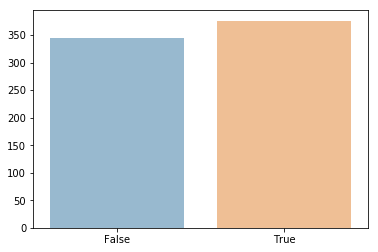

In [314]:
#no of logged in and logged out users about inquiries
no_log = pd.value_counts(data_type_in['logged_in'])
print(no_log)
sns.barplot(no_log.index,no_log.values, alpha = 0.5)
plt.show()

In [315]:
data_types['inquiry_type'] = data_type_in['referrer'].str.split('/')

In [317]:
data_types['inquiry_type'][5]

['https:',
 '',
 'www.artsy.net',
 'artwork',
 'zsofia-schweger-sandorfalva-hungary-number-34']

In [318]:
data_type_in['received_at'] = pd.to_datetime(data_type_in['received_at'])

data_type_in['received_days'] = data_type_in['received_at'].dt.day
data_type_in['received_month'] = data_type_in['received_at'].dt.month
data_type_in['received_weekday'] = data_type_in['received_at'].dt.weekday
data_type_in['received_hour'] = data_type_in['received_at'].dt.hour

C:\Users\virin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\virin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\virin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [319]:
data_type_in.head()

,anonymous_id,logged_in,received_at,path,referrer,Types,referrer_types,inquiry_type,received_days,received_month,received_weekday,received_hour
0,e5d28888-e639-436c-9728-8f136e9518ce,True,2017-03-12 00:27:50.604,/inquiry/ryan-and-trevor-oakes-have-no-narrow-...,https://m.artsy.net/artwork/ryan-and-trevor-oa...,inquiry,"[https:, , m.artsy.net, artwork, ryan-and-trev...","[https:, , m.artsy.net, artwork, ryan-and-trev...",12,3,6,0
5,e3504db7-4d98-4aa8-95b9-6014fc3815a6,False,2017-03-12 01:40:04.647,/inquiry/zsofia-schweger-sandorfalva-hungary-n...,https://www.artsy.net/artwork/zsofia-schweger-...,inquiry,"[https:, , www.artsy.net, artwork, zsofia-schw...","[https:, , www.artsy.net, artwork, zsofia-schw...",12,3,6,1
11,c6bee50d-579c-4b2d-9015-df360a2c8d00,True,2017-03-12 07:51:46.420,/inquiry/reisha-perlmutter-reverie-2,https://m.artsy.net/artwork/reisha-perlmutter-...,inquiry,"[https:, , m.artsy.net, artwork, reisha-perlmu...","[https:, , m.artsy.net, artwork, reisha-perlmu...",12,3,6,7
14,e5ea5913-bff7-4e1f-a9dd-d02ae4828c56,True,2017-03-12 11:09:32.094,/inquiry/hiroshi-shinno-2013-dot-2-20-daikanya...,https://www.artsy.net/artwork/hiroshi-shinno-2...,inquiry,"[https:, , www.artsy.net, artwork, hiroshi-shi...","[https:, , www.artsy.net, artwork, hiroshi-shi...",12,3,6,11
16,863ebb43-c988-48b8-91cb-2143af2e6dd8,False,2017-03-12 11:43:22.157,/inquiry/nick-smith-frida-kahlo-auxochrome,https://www.artsy.net/artwork/nick-smith-frida...,inquiry,"[https:, , www.artsy.net, artwork, nick-smith-...","[https:, , www.artsy.net, artwork, nick-smith-...",12,3,6,11


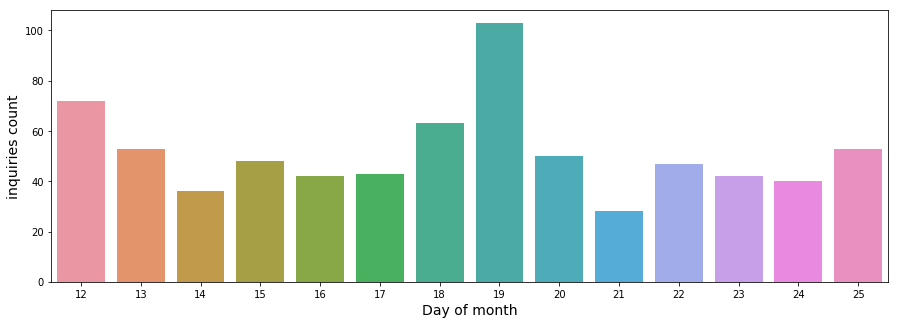

In [320]:
#Checking at what date of a month the number of inquiries are more
f = plt.figure(figsize=(15,5))
sns.countplot(x='received_days', data=data_type_in)
plt.xlabel('Day of month', fontsize=14)
plt.ylabel('inquiries count', fontsize=14)
plt.show()

The inquiries received on 19th was more when compared to rest of the days

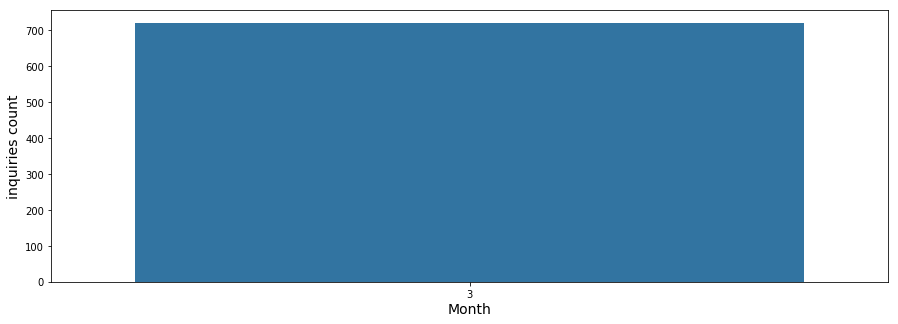

In [321]:
#Checking at what date of a month the number of inquiries are more
f = plt.figure(figsize=(15,5))
sns.countplot(x='received_month', data=data_type_in)
plt.xlabel('Month', fontsize=14)
plt.ylabel('inquiries count', fontsize=14)
plt.show()

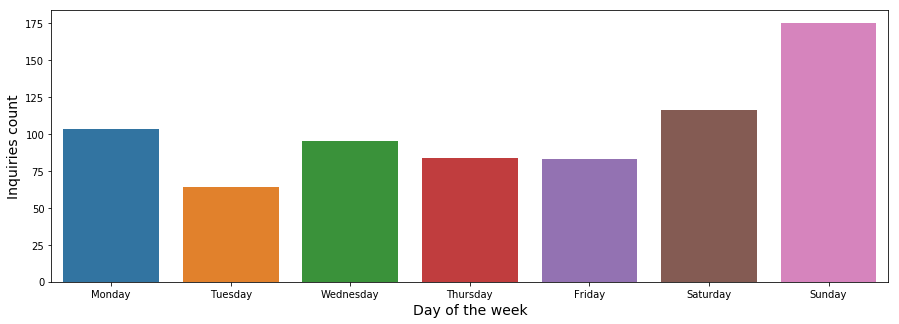

In [322]:
#Lets see if days affect the number of inquiries
f = plt.figure(figsize=(15,5))
days = [i for i in range(7)]
sns.countplot(x='received_weekday', data=data_type_in)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Inquiries count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

On Sunday we received more inquiries

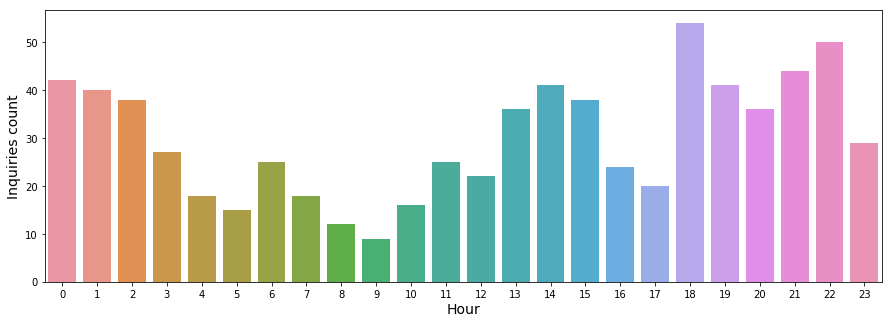

In [323]:
#How about different hours in a day
f = plt.figure(figsize=(15,5))
sns.countplot(x='received_hour', data=data_type_in)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Inquiries count', fontsize=14)
plt.show()

At Nights after 6 we receive more inquiries

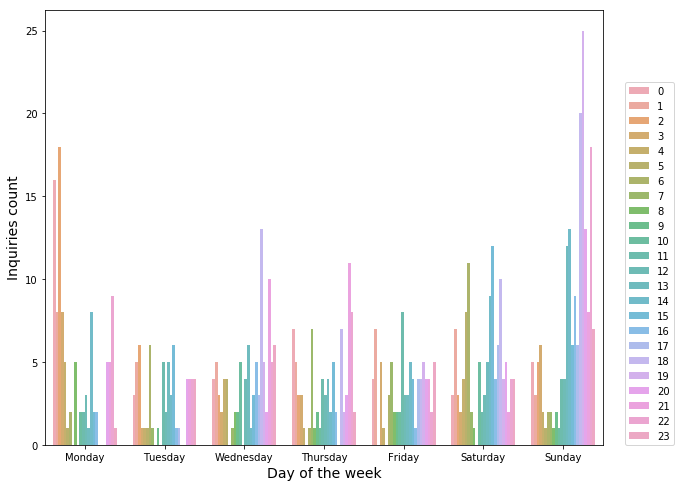

In [341]:
#How about segmenting days with hours 
f = plt.figure(figsize=(10,8))
days = [i for i in range(7)]
sns.countplot(x='received_weekday', data=data_type_in, hue='received_hour', alpha=0.8)
plt.xlabel('Day of the week', fontsize=14)
plt.ylabel('Inquiries count', fontsize=14)
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.legend(loc=(1.04,0))
plt.show()

On Sunday late nights and Monday early mornings we received more inquiries

In [335]:
types = []
for anonymous_id in data_type_in['inquiry_type']:
    types.append(data_type_in['inquiry_type'][0][3])
    

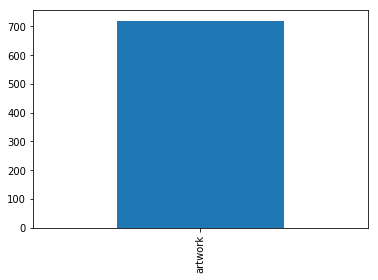

In [340]:
inquiry_types_count = pd.value_counts(types)
inquiry_types_count.plot(kind='bar')
plt.show()

 By the above analysis we can conclude that the inquiries inquired in the inquiries page are only about Artwork 

<h1> Question 5 </h1>

As the inquiries are only about artworks Artsy might customize the home page so as it allows the visitors to inquire about other types aswell.

From the above analysis we got that only inquires are about Artworks. So, it might be that the users might not find enough content about other types to go through and ask any questions!

1.     Feature:

When the users open the website, then you pop up an alert box asking them if they are interested in subscribing to an email newsletter to the category of art they are interested in knowing along with inquire option. In such cases, every user will check the email daily so if they come across any art item that interests them then may inquire. This is one feature that can be implemented.

 

2.Design Change:

 

The search button is on top left which is unusual compared to the regular websites as it is usually top right. Users feel to browse and want to invest time when feel familiar with the elements organization. This makes them easy to search the art they are interested in and inquires will increase. Also it is good if direct action to call button is placed when users are interested in inquiring because sometimes they may have lot of queries which users may feel that it takes lot of time.



<h1> Question 6</h1>

In [342]:
pageviews['date'], pageviews['time'] = zip(*pageviews['received_at'].map(lambda x: x.split(' ')))

In [343]:
pageviews.head(5)

,anonymous_id,logged_in,received_at,path,referrer,type,date,time
0,ad31b961-d67f-497c-9def-9193d518863a,False,2017-03-12 18:23:28.241,/artist/anish-kapoor,http://m.facebook.com,"[, artist, anish-kapoor]",2017-03-12,18:23:28.241
1,dd14cc5c-f31a-4591-974d-1233346b1999,False,2017-03-20 20:36:32.177,/artwork/vernon-fisher-happy-family,NaN,"[, artwork, vernon-fisher-happy-family]",2017-03-20,20:36:32.177
2,9b459a76-aaa3-44cd-9f0e-af7fb9829b2c,False,2017-03-14 05:19:47.852,/article/francesca-gavin-10-new-artists-to-wat...,https://www.google.ge/,"[, article, francesca-gavin-10-new-artists-to-...",2017-03-14,05:19:47.852
3,cb745df7-c90d-4339-9519-960081515b8c,False,2017-03-14 02:50:29.697,/article/artsy-editorial-8-female-surrealists-...,https://l.facebook.com/l.php?u=https%3A%2F%2Fw...,"[, article, artsy-editorial-8-female-surrealis...",2017-03-14,02:50:29.697
4,8b18968d-4e51-4e00-b60c-d80b1ad6a55c,False,2017-03-15 09:07:07.436,/article/artsy-editorial-why-these-7-artists-q...,https://www.facebook.com/,"[, article, artsy-editorial-why-these-7-artist...",2017-03-15,09:07:07.436


In [344]:
pageviews['date'].max()

'2017-03-25'

In [345]:
pageviews[['anonymous_id', 'logged_in', 'received_at', 'path', 'referrer', 'date',
       'time']].groupby(['date']).agg([ 'count'])

,anonymous_id,logged_in,received_at,path,referrer,time
,count,count,count,count,count,count
date,,,,,,
2017-03-12,6621,6621,6621,6621,5187,6621
2017-03-13,7449,7449,7449,7449,6036,7449
2017-03-14,8199,8199,8199,8199,6542,8199
2017-03-15,8355,8355,8355,8355,6779,8355
2017-03-16,7774,7774,7774,7774,6188,7774
2017-03-17,6158,6158,6158,6158,4963,6158
2017-03-18,5532,5532,5532,5532,4379,5532
2017-03-19,6685,6685,6685,6685,5228,6685


In [346]:
ts_data = pageviews.groupby(['date']).size().reset_index(name='counts')

In [347]:
print(ts_data)

          date  counts
0   2017-03-12    6621
1   2017-03-13    7449
2   2017-03-14    8199
3   2017-03-15    8355
4   2017-03-16    7774
5   2017-03-17    6158
6   2017-03-18    5532
7   2017-03-19    6685
8   2017-03-20    7597
9   2017-03-21    7622
10  2017-03-22    7598
11  2017-03-23    7991
12  2017-03-24    6677
13  2017-03-25    5742


In [348]:
ts_data['counts_orig'] = ts_data['counts'] # to save a copy of the original data..you'll see why shortly. 
# log-transform y
ts_data['counts'] = np.log(ts_data['counts'])

In [350]:
print(ts_data)

          date    counts  counts_orig
0   2017-03-12  8.798002         6621
1   2017-03-13  8.915835         7449
2   2017-03-14  9.011767         8199
3   2017-03-15  9.030615         8355
4   2017-03-16  8.958540         7774
5   2017-03-17  8.725507         6158
6   2017-03-18  8.618305         5532
7   2017-03-19  8.807621         6685
8   2017-03-20  8.935509         7597
9   2017-03-21  8.938794         7622
10  2017-03-22  8.935640         7598
11  2017-03-23  8.986071         7991
12  2017-03-24  8.806424         6677
13  2017-03-25  8.655563         5742


In [349]:
ts_data = pd.DataFrame(ts_data)
ts_data.to_csv('ts_data.csv',index=False)

The timeseries analysis is done in R